In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
def suites(A, x0, N, eps=1e-12):
    A = np.asarray(A, dtype=float)
    q0 = np.asarray(x0, dtype=float).reshape(-1, 1)
    q0 = q0 / np.linalg.norm(q0)

    x = [q0]          # x[0] = q0 (ou x0 normalisé)
    q = [q0]
    lamb = []

    for k in range(1, N):
        xk = A @ q[k-1]
        x.append(xk)

        # lambda composante par composante, sans division par zéro
        lamk = np.divide(
            xk, q[k-1],
            out=np.full_like(xk, np.nan),
            where=np.abs(q[k-1]) > eps
        )
        lamb.append(lamk)

        normx = np.linalg.norm(xk)
        if normx < eps:
            break
        q.append(xk / normx)

    return x, lamb, q

Affichage des valeurs de lambda :


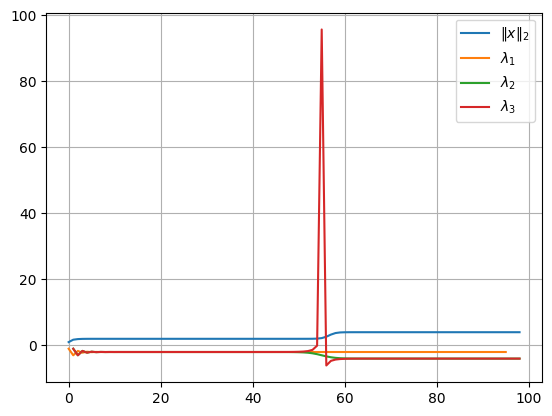

In [24]:
A = np.array([[-1,-1,1],
              [-1,-2,-2],
              [1,-2,-2]], dtype=float)

x0 = np.array([[1.],
               [0.],
               [0.]], dtype=float)

x, lamb, q = suites(A, x0, 100)

print("Affichage des valeurs de lambda :")
l1, l2, l3, xnorm2 = [], [], [], []

for i in range(len(lamb)):
    lam = np.asarray(lamb[i]).reshape(-1)   # (3,)
    l1.append(lam[0])
    l2.append(lam[1])
    l3.append(lam[2])
    xnorm2.append(np.linalg.norm(x[i], 2))

plt.plot(range(len(lamb)), xnorm2, label=r"$\|x\|_2$")
plt.plot(range(len(lamb)), l1, label=r"$\lambda_1$")
plt.plot(range(len(lamb)), l2, label=r"$\lambda_2$")
plt.plot(range(len(lamb)), l3, label=r"$\lambda_3$")
plt.grid(True)
plt.legend()
plt.show()